# Count cars in aerial imagery using deep learning

## Table of Contents
* [Introduction](#Introduction)
* [Necessary imports](#Necessary-imports)
* [Connect to your GIS](#Connect-to-your-GIS)
* [Get data and model for analysis](#Get-data-and-model-for-analysis)
* [Detect and count cars](#Detect-and-count-cars)
* [Visualize detections on map](#Visualize-detections-on-map)
* [Conclusion](#Conclusion)
* [References](#References)

## Introduction 

ArcGIS pretrained models automate the task of digitizing and extracting geographical features from imagery and point cloud datasets. Manually extracting features from raw data, such as digitizing cars, is time consuming. Deep learning automates the process and minimizes the manual interaction necessary to complete these tasks. However, training a deep learning model can be complicated as it needs large amounts of data, computing resources, and knowledge of how deep learning works.

With ArcGIS pretrained models, we do not need to invest time and energy into training a deep learning model. The ArcGIS models have been trained on data from a variety of geographies and work well across them. These pretrained models are available on [ArcGIS Living Atlas of the World](https://livingatlas.arcgis.com/en/home/) to anyone with an ArcGIS account.

[Car Detection-USA](https://doc.arcgis.com/en/pretrained-models/latest/imagery/introduction-to-car-detection-usa.htm) is used to detect cars in high-resolution drone or aerial imagery. Car detection can be used for applications such as traffic management and analysis, parking lot utilization, urban planning, and more. It can also be used as a proxy for deriving economic indicators and estimating retail sales. High-resolution aerial and drone imagery can be used for car detection due to its high spatiotemporal coverage.

## Necessary imports

In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.learn import detect_objects
from arcgis.raster.functions import equal_to

import pandas as pd
from datetime import datetime as dt
from ipywidgets import HBox, VBox, Label, Layout

## Connect to your GIS

In [2]:
gis = GIS("home")

First, search for your imagery layer in ArcGIS Online. We can search for content shared by users outside our organization by setting `outside_org` to True.

## Get data and model for analysis

We have downloaded aerial imagery from [OpenAerialMap](https://openaerialmap.org/) and published it as an imagery layer, allowing us to search for it below.

In [3]:
imagery = gis.content.search("aerial*")
imagery

[<Item title:"aerial5cb0ec1cfa020e0006eb43d3" type:Imagery Layer owner:demos_deldev>,
 <Item title:"aerial5d67dd5ddf35140006907ab2" type:Imagery Layer owner:demos_deldev>,
 <Item title:"aerial4263b034_c40e_4254_a70d_8b7cedbaded3" type:Imagery Layer owner:demos_deldev>,
 <Item title:"aerialc6eae8bb_e457_4303_aec7_944659176d25" type:Imagery Layer owner:demos_deldev>]

We will use four items for our analysis. Since the item is an Imagery Layer, accessing the layers property will give us a list of Imagery objects.

In [16]:
area1 = imagery[0]
area2 = imagery[1]
area3 = imagery[2]
area4 = imagery[3]

Search for the pretrained model item in `ArcGIS Living Atlas of the World`. 

<Item title:"Car Detection - USA" type:Deep Learning Package owner:esri_analytics>
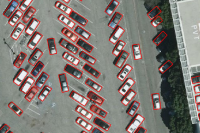

In [6]:
model = gis.content.search(
    "Car Detection-USA owner: esri_analytics", "Deep Learning Package", outside_org=True
)[0]
model

## Detect and count cars

The following code runs `detect_objects` function over each imagery and calcultates the total count of cars detected. It then stores the item id and and its cars count in a dictionary named `num_cars`.

In [ ]:
num_cars = {}
for i in range(len(imagery)):
    raster = imagery[i].layers[0]
    detected_cars = detect_objects(
        input_raster=raster,
        model=model,
        model_arguments={
            "padding": "100",
            "batch_size": "16",  # change batch size as per GPU specifications
            "threshold": "0.5",  # get detections greater than 50% confidence
            "return_bboxes": "False",
            "tile_size": "224",
        },
        output_name="detected_cars" + str(dt.now().microsecond),
        context={"processorType": "GPU", "cellSize": 1},
    )  # cell size is based on imagery resolution
    num_cars[area1.name] = len(detected_cars.layers[0].query(as_df=True))

## Visualize detections on map

Let's visualize the detected cars in one of the aerial images. 

In [74]:
map1 = gis.map()
map1

In [70]:
map1.zoom_to_layer(detected_cars.layers[0])

In [59]:
map1.extent = {
    "spatialReference": {"latestWkid": 3857, "wkid": 102100},
    "xmin": -7827819.073182879,
    "ymin": -3167815.9803417902,
    "xmax": -7827745.621976033,
    "ymax": -3167786.122127625,
}

In [23]:
num_cars  # shows number of cars detected in each imagery layer.

{'aerial5cb0ec1cfa020e0006eb43d3': 399,
 'aerial5d67dd5ddf35140006907ab2': 547,
 'aerial4263b034_c40e_4254_a70d_8b7cedbaded3': 233,
 'aerialc6eae8bb_e457_4303_aec7_944659176d25': 59}

## Conclusion

This sample demonstrated how Car Detection-USA pretrained model can be used to detect cars in an aerial imagery and get the cars count in an area. 

## References

- Imagery from [OpenAerialMap](https://openaerialmap.org/) is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)